In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sweep_ids = ['g1aqz63h', 'otphs2zh',
             's45fguzh', '1cesj6eh', 'ptu13u3u',
             'ire6sash', 'bc20nbk8',
             's03kce3d']
config_names = ['tl_fast1', 'tl_fast1',
                'tl_best5', 'tl_best5', 'tl_best5_normalized',
                'tl_best4', 'tl_best4',
                'baseline_normalized']

In [ ]:
import wandb
api = wandb.Api()

In [ ]:
metric = 'f1_score'

In [ ]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [ ]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
55,tl_fast1,devout-sweep-1,0.976330
56,tl_fast1,curious-sweep-2,0.975395
57,tl_fast1,trim-sweep-3,0.979741
58,tl_fast1,ethereal-sweep-4,0.980595
59,tl_fast1,swift-sweep-5,0.979934


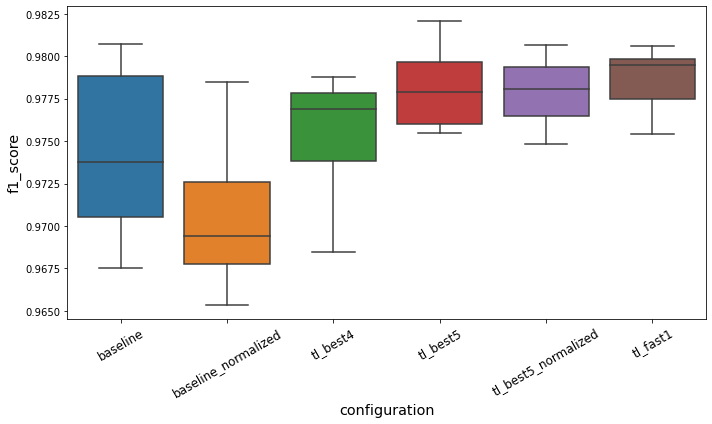

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()))

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large', rotation=30)
#ax.set_xticks([])
fig.tight_layout()

# fig.savefig('../figs/glitches/14_transfer_aug_scores.png', dpi=300)

Previously, I forgot to normalize the inputs in transfer learning.  
However, this does not seem to be an issue due to the retraining of the batch norm layers (see https://twitter.com/jeremyphoward/status/1542319461885411329?s=20&t=_PSVt2XQdP5R0ekJ4-U5DQ).

In training from scratch, normalization yielded worse results than no normalization.  
This can be due to the fact that the energy values are already between 0 and 0.8, with a mean around 0.15 and an std of 0.1.